In [1]:
from platform import python_version

print(python_version())

3.9.6


## High Entropy Alloy(HEA) Classifier


---
This is the first submodule of our work which classifies if the given input is HEA or non-HEA


In [2]:
from sklearn.svm import SVC,NuSVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
from hypopt import GridSearch
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# from google.colab import drive

Loading Dataset for classifier

In [68]:
main_hea = pd.read_csv("../Datasets/Final_HEA_Classifier.csv")

main_hea.columns

Index(['Alloy', 'Length', 'HEA/Non-HEA', 'Al', 'Ca', 'Cu', 'Zr', 'Ni', 'Nb',
       'Ag', 'Mg', 'Gd', 'Au', 'Si', 'Zn', 'Ce', 'Hf', 'Ti', 'Ga', 'Dy', 'Co',
       'Er', 'Fe', 'Ho', 'La', 'Lu', 'Nd', 'Pr', 'Tb', 'Ta', 'Pd', 'Sm', 'Tm',
       'Be', 'Mo', 'Li', 'In', 'Mn', 'Sn', 'Sc', 'Yb', 'Cr', 'Pb', 'Ge', 'Pt',
       'As', 'B', 'Ba', 'Bi', 'Br', 'C', 'Cd', 'Cl', 'Cs', 'Eu', 'F', 'H',
       'Hg', 'I', 'Ir', 'K', 'N', 'Na', 'Ne', 'Ns', 'O', 'Os', 'P', 'Rb', 'Re',
       'Rh', 'Ru', 'S', 'Sb', 'Se', 'Sr', 'Te', 'Tl', 'V', 'W', 'Y', 'Tc'],
      dtype='object')

In [69]:
main_hea.isnull().values.any()

False

Train-Test Split on compiled dataset is shown below and train and test sets are saved as .csv format which can be directly used for loading into models.

In [70]:
features = ['Al', 'Ca', 'Cu', 'Zr', 'Ni', 'Nb', 'Ag', 'Mg','Gd', 'Au', 'Si', 'Zn', 'Ce', 'Hf', 'Ti', 'Ga', 'Dy', 'Co', 'Er', 'Fe','Ho', 'La', 'Lu', 'Nd', 'Pr', 'Tb', 'Ta', 'Pd', 'Sm', 'Tm', 'Be', 'Mo','Li', 'In', 'Mn', 'Sn', 'Sc', 'Yb', 'Cr', 'Pb', 'Ge', 'Pt','As', 'B', 'Ba', 'Bi', 'Br', 'C', 'Cd', 'Cl', 'Cs', 'Eu','F', 'H', 'Hg', 'I', 'Ir', 'K', 'N', 'Na', 'Ne', 'Ns', 'O', 'Os', 'P','Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Se', 'Sr', 'Te', 'Tl', 'V', 'W','Y', 'Tc']
X = main_hea[features]#, errors = 'ignore'.astype('float').values
y = main_hea['HEA/Non-HEA'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .70)


X_train.to_csv("../Datasets/Classifier_sets/random_state_0/Classifier_X_train.csv", index=False)
X_test.to_csv("../Datasets/Classifier_sets/random_state_0/Classifier_X_test.csv", index=False)
pd.DataFrame(y_train).to_csv("../Datasets/Classifier_sets/random_state_0/Classifier_y_train.csv", index=False)
pd.DataFrame(y_test).to_csv("../Datasets/Classifier_sets/random_state_0/Classifier_y_test.csv", index=False)


In [71]:
print(type(y_train),y_train.shape)

<class 'numpy.ndarray'> (1320,)


Train and Test set feature and label shapes

In [72]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1320, 79) (1320,) (567, 79) (567,)


Logistic Regression

In [8]:
penalty = ["l2", "l1", "elasticnet"]
intercept_scaling = [x for x in np.arange(0.6,1.4,0.2)]
C =  [x for x in np.arange(0,1.2,0.05)] 
tol = [x for x in np.arange(0,0.004,0.0005)] 
random_state=[0]

random_grid = {'penalty': penalty,
               'tol': tol,
               'C':C,
               'random_state':random_state
               }
              
lr = GridSearch(model = LogisticRegression(),param_grid=random_grid,cv_folds=5)    
lr_model = lr.fit(X_train, np.array(y_train))

In [9]:
lr_model.get_params()

{'C': 0.35000000000000003,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0,
 'verbose': 0,
 'warm_start': False}

Support Vector Classifier(SVC)

In [10]:
kernel = ["linear", "poly", "rbf", "sigmoid"] 
degree = [2,3,4]
coef0 = [x for x in np.arange(0,0.5,0.05)]
C =  [x for x in np.arange(0,1.2,0.05)]
random_state=[0]
probability = [True]

random_grid = {'kernel': kernel,
               'degree': degree,
               'coef0':coef0,
               'C':C,
               'random_state':random_state,
               'probability':probability
               }
             
svc = GridSearch(model = SVC(),param_grid=random_grid,cv_folds=5)    
svc_model = svc.fit(X_train, np.array(y_train))

In [11]:
svc_model.get_params()

{'C': 0.5,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.05,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': True,
 'random_state': 0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Nu-Support Vector Classifier(NuSVC)

In [12]:
nu = [x for x in np.arange(0,0.7,0.025)] 
kernel = ["linear", "poly", "rbf", "sigmoid"] 
degree = [2,3,4]
coef0 = [x for x in np.arange(0,0.4,0.05)] 
probability = [True]
random_state=[0]

random_grid = {'kernel': kernel,
               'degree': degree,
               'coef0':coef0,
               'nu':nu,
               'random_state':random_state,
               'probability':probability
               }
              
nusvc = GridSearch(model = NuSVC(),param_grid=random_grid,cv_folds=5)    
nusvc_model = nusvc.fit(X_train, np.array(y_train))


In [13]:
nusvc_model.get_params()

{'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.05,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'nu': 0.625,
 'probability': True,
 'random_state': 0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Stochastic Gradient Descent(SGD) Classifier

In [14]:
penalty = ["l1", "l2","elasticnet"] 
alpha = [x for x in np.arange(0.0001,0.0002,0.00005)]
random_state=[0]
loss = ['modified_huber']

random_grid = {'penalty': penalty,
               'alpha': alpha,
               'random_state':random_state,
               'loss':loss
               }
             
sgd = GridSearch(model = SGDClassifier(),param_grid=random_grid,cv_folds=5)    
sgd_model = sgd.fit(X_train, np.array(y_train))

In [15]:
sgd_model.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'modified_huber',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'elasticnet',
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

KNeighbors Classifier

In [16]:
leaf_size = list(range(25,40,2))
n_neighbors = list(range(3,12))
algorithm = ["auto", "ball_tree", "kd_tree","brute"]
p = [1,2]

random_grid = {'leaf_size': leaf_size,
               'n_neighbors': n_neighbors,
               'algorithm':algorithm,
               'p':p
               }
              
knc = GridSearch(model = KNeighborsClassifier(),param_grid=random_grid,cv_folds=5)    
kneighbors_model = knc.fit(X_train, np.array(y_train))

In [17]:
kneighbors_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 25,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 11,
 'p': 1,
 'weights': 'uniform'}

Gradient Boosting Classifier

In [18]:
n_estimators = list(range(80,105,5))
min_samples_split = list(range(2,4)) 
max_depth = list(range(1,12)) 
min_samples_leaf = list(range(1,3)) 

learning_rate = list(np.arange(0,0.35,0.05)) 
random_state = [0]

random_grid = {'n_estimators': n_estimators,
               'min_samples_split': min_samples_split,
               'max_depth':max_depth,
               'min_samples_leaf':min_samples_leaf,
               'learning_rate':learning_rate,
               'random_state':random_state
               }
              
gbc = GridSearch(model = GradientBoostingClassifier(),param_grid=random_grid,cv_folds=5)    
gradientBoosting_model = gbc.fit(X_train, np.array(y_train))

In [19]:
gradientBoosting_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

AdaBoost Classifier

In [20]:
n_estimators = list(range(40,150,5))
learning_rate = list(np.arange(1,3,0.25)) 
algorithm = ['SAMME','SAMME.R']
random_state = [0]

random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'algorithm':algorithm,
               'random_state':random_state
               }
              
abc = GridSearch(model = AdaBoostClassifier(),param_grid=random_grid,cv_folds=5)    
AdaBoost_model = abc.fit(X_train, np.array(y_train))

In [21]:
AdaBoost_model.get_params()

{'algorithm': 'SAMME',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.75,
 'n_estimators': 115,
 'random_state': 0}

Random Forest Classifier

In [22]:
n_estimators = list(range(70,130,5))
min_samples_split = list(range(2,4)) 
max_depth = list(range(1,15))
max_features = ["auto", "sqrt", "log2"]
random_state = [0]

random_grid = {'n_estimators': n_estimators,
               'min_samples_split': min_samples_split,
               'max_depth':max_depth,
               'max_features':max_features,
               'random_state':random_state
               }
              
rfc = GridSearch(model = RandomForestClassifier(),param_grid=random_grid,cv_folds=5)    
RFC_model = rfc.fit(X_train, np.array(y_train))

In [23]:
RFC_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 14,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 70,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

Extreme Gradient Boosting (XGB) Classifier

In [24]:
booster = ['gbtree', 'gblinear', 'dart']
eta = list(np.arange(0,1, 0.05)) 
max_depth = list(range(3,10)) 

random_grid = {'booster': booster,
               'eta': eta,
               'max_depth':max_depth
               }
              
xgbc = GridSearch(model = XGBClassifier(),param_grid=random_grid,cv_folds=5)    
XGB_Classifier_model = xgbc.fit(X_train, np.array(y_train))

In [25]:
XGB_Classifier_model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 7,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'eta': 0.75}

Decision Tree Classifier

In [26]:
min_samples_split = list(range(2,5)) 
max_depth = list(range(1,15)) 
min_samples_leaf = list(range(1,3)) 
max_features = ["auto", "sqrt", "log2"]
random_state = [0]

random_grid = {
               'min_samples_split': min_samples_split,
               'max_depth':max_depth,
               'min_samples_leaf':min_samples_leaf,
               'max_features':max_features,
               'random_state':random_state
               }
         
dtc = GridSearch(model = DecisionTreeClassifier(),param_grid=random_grid,cv_folds=5)    
DTC_model = dtc.fit(X_train, np.array(y_train))

In [27]:
DTC_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 11,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

Extra Trees Classifier

In [28]:
n_estimators = list(range(70,130,5))
min_samples_split = list(range(2,5)) 
max_depth = list(range(1,12)) 
min_samples_leaf = list(range(1,3)) 
max_features = ["auto", "sqrt", "log2"]
random_state = [0]

random_grid = {
               'n_estimators':n_estimators,
               'min_samples_split': min_samples_split,
               'max_depth':max_depth,
               'min_samples_leaf':min_samples_leaf,
               'max_features':max_features,
               'random_state':random_state
               }
              
etc = GridSearch(model = ExtraTreesClassifier(),param_grid=random_grid,cv_folds=5)    
ExtraTreesClassifier_model = etc.fit(X_train, np.array(y_train))

In [29]:
ExtraTreesClassifier_model.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 110,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

Gaussian Naive Bayes(GaussianNB) Classifier

In [30]:
var_smoothing = [x for x in np.arange(0.0000000005,0.000000003,0.0000000005)]

random_grid = {
               'var_smoothing':var_smoothing
               }

gnb = GridSearch(model = GaussianNB(),param_grid=random_grid,cv_folds=5)    
GaussianNB_model = gnb.fit(X_train, np.array(y_train))

In [31]:
GaussianNB_model.get_params()

{'priors': None, 'var_smoothing': 5e-10}

Saving Models

In [32]:
filename = '../Saved Models/Classifier Models/random_state_0/classifier_logistic_regression.sav'
pickle.dump(lr_model, open(filename, 'wb'))
filename = '../Saved Models/Classifier Models/random_state_0/classifier_SVC.sav'
pickle.dump(svc_model, open(filename, 'wb'))
filename = '../Saved Models/Classifier Models/random_state_0/classifier_NuSVC.sav'
pickle.dump(nusvc_model, open(filename, 'wb'))
filename = '../Saved Models/Classifier Models/random_state_0/classifier_SGD.sav'
pickle.dump(sgd_model, open(filename, 'wb'))
filename = '../Saved Models/Classifier Models/random_state_0/classifier_kneighbors.sav'
pickle.dump(kneighbors_model, open(filename, 'wb'))
filename = '../Saved Models/Classifier Models/random_state_0/classifier_gradientBoosting.sav'
pickle.dump(gradientBoosting_model, open(filename, 'wb'))
filename = '../Saved Models/Classifier Models/random_state_0/classifier_adaBoosting.sav'
pickle.dump(AdaBoost_model, open(filename, 'wb'))
filename = '../Saved Models/Classifier Models/random_state_0/classifier_randomForestClassifier.sav'
pickle.dump(RFC_model, open(filename, 'wb'))
filename = '../Saved Models/Classifier Models/random_state_0/classifier_XGB_Classifier.sav'
pickle.dump(XGB_Classifier_model, open(filename, 'wb'))
filename = '../Saved Models/Classifier Models/random_state_0/classifier_DecisionTree_Classifier.sav'
pickle.dump(DTC_model, open(filename, 'wb'))
filename = '../Saved Models/Classifier Models/random_state_0/classifier_ExtraTreesClassifier.sav'
pickle.dump(ExtraTreesClassifier_model, open(filename, 'wb'))
filename = '../Saved Models/Classifier Models/random_state_0/classifier_GaussianNB.sav'
pickle.dump(GaussianNB_model, open(filename, 'wb'))

Computing Metrics

In [33]:
# Logistic Regression Metrics
train_pred = lr_model.predict(X_train)
test_pred = lr_model.predict(X_test)

lr_Accuracy_Train = accuracy_score(np.array(y_train), train_pred)
lr_Accuracy_Test = accuracy_score(np.array(y_test), test_pred)

lr_Precision_Train = precision_score(np.array(y_train), train_pred)
lr_Precision_Test = precision_score(np.array(y_test), test_pred)

lr_Recall_Train = recall_score(np.array(y_train), train_pred)
lr_Recall_Test = recall_score(np.array(y_test), test_pred)

lr_f1_score_Train = f1_score(np.array(y_train), train_pred)
lr_f1_score_Test = f1_score(np.array(y_test), test_pred)

lr_ROC_AUC_Score_Train = roc_auc_score(np.array(y_train), train_pred)
lr_ROC_AUC_Score_Test = roc_auc_score(np.array(y_test), test_pred)

lr_cross_val_score_Train = list(cross_val_score(lr_model, X_train, np.array(y_train), cv=KFold(n_splits=5,shuffle=True)) )

# Support Vector Classifier Metrics
train_pred = svc_model.predict(X_train)
test_pred = svc_model.predict(X_test)

svc_Accuracy_Train = accuracy_score(np.array(y_train), train_pred)
svc_Accuracy_Test = accuracy_score(np.array(y_test), test_pred)

svc_Precision_Train = precision_score(np.array(y_train), train_pred)
svc_Precision_Test = precision_score(np.array(y_test), test_pred)

svc_Recall_Train = recall_score(np.array(y_train), train_pred)
svc_Recall_Test = recall_score(np.array(y_test), test_pred)

svc_f1_score_Train = f1_score(np.array(y_train), train_pred)
svc_f1_score_Test = f1_score(np.array(y_test), test_pred)

svc_ROC_AUC_Score_Train = roc_auc_score(np.array(y_train), train_pred)
svc_ROC_AUC_Score_Test = roc_auc_score(np.array(y_test), test_pred)

svc_cross_val_score_Train = list(cross_val_score(svc_model, X_train, np.array(y_train), cv=KFold(n_splits=5,shuffle=True)) )


# NuSVC Metrics
train_pred = nusvc_model.predict(X_train)
test_pred = nusvc_model.predict(X_test)

nusvc_Accuracy_Train = accuracy_score(np.array(y_train), train_pred)
nusvc_Accuracy_Test = accuracy_score(np.array(y_test), test_pred)

nusvc_Precision_Train = precision_score(np.array(y_train), train_pred)
nusvc_Precision_Test = precision_score(np.array(y_test), test_pred)

nusvc_Recall_Train = recall_score(np.array(y_train), train_pred)
nusvc_Recall_Test = recall_score(np.array(y_test), test_pred)

nusvc_f1_score_Train = f1_score(np.array(y_train), train_pred)
nusvc_f1_score_Test = f1_score(np.array(y_test), test_pred)

nusvc_ROC_AUC_Score_Train = roc_auc_score(np.array(y_train), train_pred)
nusvc_ROC_AUC_Score_Test = roc_auc_score(np.array(y_test), test_pred)

nusvc_cross_val_score_Train = list(cross_val_score(nusvc_model, X_train, np.array(y_train), cv=KFold(n_splits=5,shuffle=True)) )


# Stochastic Gradient Descent Metrics
train_pred = sgd_model.predict(X_train)
test_pred = sgd_model.predict(X_test)

sgd_Accuracy_Train = accuracy_score(np.array(y_train), train_pred)
sgd_Accuracy_Test = accuracy_score(np.array(y_test), test_pred)

sgd_Precision_Train = precision_score(np.array(y_train), train_pred)
sgd_Precision_Test = precision_score(np.array(y_test), test_pred)

sgd_Recall_Train = recall_score(np.array(y_train), train_pred)
sgd_Recall_Test = recall_score(np.array(y_test), test_pred)

sgd_f1_score_Train = f1_score(np.array(y_train), train_pred)
sgd_f1_score_Test = f1_score(np.array(y_test), test_pred)

sgd_ROC_AUC_Score_Train = roc_auc_score(np.array(y_train), train_pred)
sgd_ROC_AUC_Score_Test = roc_auc_score(np.array(y_test), test_pred)

sgd_cross_val_score_Train = list(cross_val_score(sgd_model, X_train, np.array(y_train), cv=KFold(n_splits=5,shuffle=True)) )


# KNeighbors Metrics
train_pred = kneighbors_model.predict(X_train)
test_pred = kneighbors_model.predict(X_test)

knc_Accuracy_Train = accuracy_score(np.array(y_train), train_pred)
knc_Accuracy_Test = accuracy_score(np.array(y_test), test_pred)

knc_Precision_Train = precision_score(np.array(y_train), train_pred)
knc_Precision_Test = precision_score(np.array(y_test), test_pred)

knc_Recall_Train = recall_score(np.array(y_train), train_pred)
knc_Recall_Test = recall_score(np.array(y_test), test_pred)

knc_f1_score_Train = f1_score(np.array(y_train), train_pred)
knc_f1_score_Test = f1_score(np.array(y_test), test_pred)

knc_ROC_AUC_Score_Train = roc_auc_score(np.array(y_train), train_pred)
knc_ROC_AUC_Score_Test = roc_auc_score(np.array(y_test), test_pred)

knc_cross_val_score_Train = list(cross_val_score(kneighbors_model, X_train, np.array(y_train), cv=KFold(n_splits=5,shuffle=True)) )


#Gradient Boosting Metrics
train_pred = gradientBoosting_model.predict(X_train)
test_pred = gradientBoosting_model.predict(X_test)

gbc_Accuracy_Train = accuracy_score(np.array(y_train), train_pred)
gbc_Accuracy_Test = accuracy_score(np.array(y_test), test_pred)

gbc_Precision_Train = precision_score(np.array(y_train), train_pred)
gbc_Precision_Test = precision_score(np.array(y_test), test_pred)

gbc_Recall_Train = recall_score(np.array(y_train), train_pred)
gbc_Recall_Test = recall_score(np.array(y_test), test_pred)

gbc_f1_score_Train = f1_score(np.array(y_train), train_pred)
gbc_f1_score_Test = f1_score(np.array(y_test), test_pred)

gbc_ROC_AUC_Score_Train = roc_auc_score(np.array(y_train), train_pred)
gbc_ROC_AUC_Score_Test = roc_auc_score(np.array(y_test), test_pred)

gbc_cross_val_score_Train = list(cross_val_score(gradientBoosting_model, X_train, np.array(y_train), cv=KFold(n_splits=5,shuffle=True)) )


# AdaBoost Metrics
train_pred = AdaBoost_model.predict(X_train)
test_pred = AdaBoost_model.predict(X_test)

abc_Accuracy_Train = accuracy_score(np.array(y_train), train_pred)
abc_Accuracy_Test = accuracy_score(np.array(y_test), test_pred)

abc_Precision_Train = precision_score(np.array(y_train), train_pred)
abc_Precision_Test = precision_score(np.array(y_test), test_pred)

abc_Recall_Train = recall_score(np.array(y_train), train_pred)
abc_Recall_Test = recall_score(np.array(y_test), test_pred)

abc_f1_score_Train = f1_score(np.array(y_train), train_pred)
abc_f1_score_Test = f1_score(np.array(y_test), test_pred)

abc_ROC_AUC_Score_Train = roc_auc_score(np.array(y_train), train_pred)
abc_ROC_AUC_Score_Test = roc_auc_score(np.array(y_test), test_pred)

abc_cross_val_score_Train = list(cross_val_score(AdaBoost_model, X_train, np.array(y_train), cv=KFold(n_splits=5,shuffle=True)) )


# Random Forest Metrics
train_pred = RFC_model.predict(X_train)
test_pred = RFC_model.predict(X_test)

rfc_Accuracy_Train = accuracy_score(np.array(y_train), train_pred)
rfc_Accuracy_Test = accuracy_score(np.array(y_test), test_pred)

rfc_Precision_Train = precision_score(np.array(y_train), train_pred)
rfc_Precision_Test = precision_score(np.array(y_test), test_pred)

rfc_Recall_Train = recall_score(np.array(y_train), train_pred)
rfc_Recall_Test = recall_score(np.array(y_test), test_pred)

rfc_f1_score_Train = f1_score(np.array(y_train), train_pred)
rfc_f1_score_Test = f1_score(np.array(y_test), test_pred)

rfc_ROC_AUC_Score_Train = roc_auc_score(np.array(y_train), train_pred)
rfc_ROC_AUC_Score_Test = roc_auc_score(np.array(y_test), test_pred)

rfc_cross_val_score_Train = list(cross_val_score(RFC_model, X_train, np.array(y_train), cv=KFold(n_splits=5,shuffle=True)) )


# Extreme Gradient Boosting Metrics
train_pred = XGB_Classifier_model.predict(X_train)
test_pred = XGB_Classifier_model.predict(X_test)

xgbc_Accuracy_Train = accuracy_score(np.array(y_train), train_pred)
xgbc_Accuracy_Test = accuracy_score(np.array(y_test), test_pred)

xgbc_Precision_Train = precision_score(np.array(y_train), train_pred)
xgbc_Precision_Test = precision_score(np.array(y_test), test_pred)

xgbc_Recall_Train = recall_score(np.array(y_train), train_pred)
xgbc_Recall_Test = recall_score(np.array(y_test), test_pred)

xgbc_f1_score_Train = f1_score(np.array(y_train), train_pred)
xgbc_f1_score_Test = f1_score(np.array(y_test), test_pred)

xgbc_ROC_AUC_Score_Train = roc_auc_score(np.array(y_train), train_pred)
xgbc_ROC_AUC_Score_Test = roc_auc_score(np.array(y_test), test_pred)

xgbc_cross_val_score_Train = list(cross_val_score(XGB_Classifier_model, X_train, np.array(y_train), cv=KFold(n_splits=5,shuffle=True)) )


# Decision Tree Metrics
train_pred = DTC_model.predict(X_train)
test_pred = DTC_model.predict(X_test)

dtc_Accuracy_Train = accuracy_score(np.array(y_train), train_pred)
dtc_Accuracy_Test = accuracy_score(np.array(y_test), test_pred)

dtc_Precision_Train = precision_score(np.array(y_train), train_pred)
dtc_Precision_Test = precision_score(np.array(y_test), test_pred)

dtc_Recall_Train = recall_score(np.array(y_train), train_pred)
dtc_Recall_Test = recall_score(np.array(y_test), test_pred)

dtc_f1_score_Train = f1_score(np.array(y_train), train_pred)
dtc_f1_score_Test = f1_score(np.array(y_test), test_pred)

dtc_ROC_AUC_Score_Train = roc_auc_score(np.array(y_train), train_pred)
dtc_ROC_AUC_Score_Test = roc_auc_score(np.array(y_test), test_pred)

dtc_cross_val_score_Train = list(cross_val_score(DTC_model, X_train, np.array(y_train), cv=KFold(n_splits=5,shuffle=True)) )


#Extra Trees Classifier Metrics
train_pred = ExtraTreesClassifier_model.predict(X_train)
test_pred = ExtraTreesClassifier_model.predict(X_test)

etc_Accuracy_Train = accuracy_score(np.array(y_train), train_pred)
etc_Accuracy_Test = accuracy_score(np.array(y_test), test_pred)

etc_Precision_Train = precision_score(np.array(y_train), train_pred)
etc_Precision_Test = precision_score(np.array(y_test), test_pred)

etc_Recall_Train = recall_score(np.array(y_train), train_pred)
etc_Recall_Test = recall_score(np.array(y_test), test_pred)

etc_f1_score_Train = f1_score(np.array(y_train), train_pred)
etc_f1_score_Test = f1_score(np.array(y_test), test_pred)

etc_ROC_AUC_Score_Train = roc_auc_score(np.array(y_train), train_pred)
etc_ROC_AUC_Score_Test = roc_auc_score(np.array(y_test), test_pred)

etc_cross_val_score_Train = list(cross_val_score(ExtraTreesClassifier_model, X_train, np.array(y_train), cv=KFold(n_splits=5,shuffle=True)) )


#GaussianNB Metrics

train_pred = GaussianNB_model.predict(X_train)
test_pred = GaussianNB_model.predict(X_test)

gnb_Accuracy_Train = accuracy_score(np.array(y_train), train_pred)
gnb_Accuracy_Test = accuracy_score(np.array(y_test), test_pred)

gnb_Precision_Train = precision_score(np.array(y_train), train_pred)
gnb_Precision_Test = precision_score(np.array(y_test), test_pred)

gnb_Recall_Train = recall_score(np.array(y_train), train_pred)
gnb_Recall_Test = recall_score(np.array(y_test), test_pred)

gnb_f1_score_Train = f1_score(np.array(y_train), train_pred)
gnb_f1_score_Test = f1_score(np.array(y_test), test_pred)

gnb_ROC_AUC_Score_Train = roc_auc_score(np.array(y_train), train_pred)
gnb_ROC_AUC_Score_Test = roc_auc_score(np.array(y_test), test_pred)

gnb_cross_val_score_Train = list(cross_val_score(GaussianNB_model, X_train, np.array(y_train), cv=KFold(n_splits=5,shuffle=True)) )

In [34]:
models_classifier_comparison = pd.DataFrame({
    'Model'          : ['Logistic Regression', 'Support Vector Classifier', 'NuSVC', 'SGD Classifier', 'KNeighbors Classifier', 'Gradient Boosting Classifier', 'Adaboost Classifier', 'Random Forest Classifier', 'XGB Classifier', 'Decision Tree Classifier', 'Extra Trees Classifier', 'Gaussian Naive Bayes'],
    'Train Accuracy' : [lr_Accuracy_Train, svc_Accuracy_Train, nusvc_Accuracy_Train, sgd_Accuracy_Train, knc_Accuracy_Train, gbc_Accuracy_Train,abc_Accuracy_Train, rfc_Accuracy_Train, xgbc_Accuracy_Train, dtc_Accuracy_Train,etc_Accuracy_Train,gnb_Accuracy_Train],
    'Test Accuracy'  : [lr_Accuracy_Test, svc_Accuracy_Test, nusvc_Accuracy_Test, sgd_Accuracy_Test, knc_Accuracy_Test, gbc_Accuracy_Test,abc_Accuracy_Test, rfc_Accuracy_Test, xgbc_Accuracy_Test, dtc_Accuracy_Test,etc_Accuracy_Test,gnb_Accuracy_Test],
    'Train Precision': [lr_Precision_Train, svc_Precision_Train, nusvc_Precision_Train, sgd_Precision_Train, knc_Precision_Train, gbc_Precision_Train,abc_Precision_Train, rfc_Precision_Train, xgbc_Precision_Train, dtc_Precision_Train,etc_Precision_Train,gnb_Precision_Train],
    'Test Precision' : [lr_Precision_Test, svc_Precision_Test, nusvc_Precision_Test, sgd_Precision_Test, knc_Precision_Test, gbc_Precision_Test,abc_Precision_Test, rfc_Precision_Test, xgbc_Precision_Test, dtc_Precision_Test,etc_Precision_Test,gnb_Precision_Test],
    'Train Recall'   : [lr_Recall_Train, svc_Recall_Train, nusvc_Recall_Train, sgd_Recall_Train, knc_Recall_Train, gbc_Recall_Train,abc_Recall_Train, rfc_Recall_Train, xgbc_Recall_Train, dtc_Recall_Train,etc_Recall_Train,gnb_Recall_Train],
    'Test Recall'    : [lr_Recall_Test, svc_Recall_Test, nusvc_Recall_Test, sgd_Recall_Test, knc_Recall_Test, gbc_Recall_Test,abc_Recall_Test, rfc_Recall_Test, xgbc_Recall_Test, dtc_Recall_Test,etc_Recall_Test,gnb_Recall_Test],
    'Train F1_score' : [lr_f1_score_Train, svc_f1_score_Train, nusvc_f1_score_Train, sgd_f1_score_Train, knc_f1_score_Train, gbc_f1_score_Train,abc_f1_score_Train, rfc_f1_score_Train, xgbc_f1_score_Train, dtc_f1_score_Train,etc_f1_score_Train,gnb_f1_score_Train],
    'Test F1_score'  : [lr_f1_score_Test, svc_f1_score_Test, nusvc_f1_score_Test, sgd_f1_score_Test, knc_f1_score_Test, gbc_f1_score_Test,abc_f1_score_Test, rfc_f1_score_Test, xgbc_f1_score_Test, dtc_f1_score_Test,etc_f1_score_Test,gnb_f1_score_Test],
    'Train AUC_ROC'  : [lr_ROC_AUC_Score_Train, svc_ROC_AUC_Score_Train, nusvc_ROC_AUC_Score_Train, sgd_ROC_AUC_Score_Train, knc_ROC_AUC_Score_Train, gbc_ROC_AUC_Score_Train,abc_ROC_AUC_Score_Train, rfc_ROC_AUC_Score_Train, xgbc_ROC_AUC_Score_Train, dtc_ROC_AUC_Score_Train,etc_ROC_AUC_Score_Train,gnb_ROC_AUC_Score_Train],
    'Test AUC_ROC'   : [lr_ROC_AUC_Score_Test, svc_ROC_AUC_Score_Test, nusvc_ROC_AUC_Score_Test, sgd_ROC_AUC_Score_Test, knc_ROC_AUC_Score_Test, gbc_ROC_AUC_Score_Test,abc_ROC_AUC_Score_Test, rfc_ROC_AUC_Score_Test, xgbc_ROC_AUC_Score_Test, dtc_ROC_AUC_Score_Test,etc_ROC_AUC_Score_Test,gnb_ROC_AUC_Score_Test],
    'Cross_Validation_Scores_for_trainset':[lr_cross_val_score_Train, svc_cross_val_score_Train, nusvc_cross_val_score_Train, sgd_cross_val_score_Train, knc_cross_val_score_Train, gbc_cross_val_score_Train,abc_cross_val_score_Train, rfc_cross_val_score_Train, xgbc_cross_val_score_Train, dtc_cross_val_score_Train,etc_cross_val_score_Train,gnb_cross_val_score_Train],
    
    }, columns = ['Model', 'Train Accuracy', 'Test Accuracy', 'Train Precision', 'Test Precision', 'Train Recall', 'Test Recall', 'Train F1_score', 'Test F1_score', 'Train AUC_ROC', 'Test AUC_ROC', 'Cross_Validation_Scores_for_trainset'])

models_classifier_comparison.sort_values(by='Test Accuracy', ascending=False)

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1_score,Test F1_score,Train AUC_ROC,Test AUC_ROC,Cross_Validation_Scores_for_trainset
1,Support Vector Classifier,0.870455,0.783069,0.870567,0.759091,0.833616,0.704641,0.851691,0.730853,0.866877,0.772018,"[0.75, 0.7992424242424242, 0.7916666666666666,..."
2,NuSVC,0.868182,0.781305,0.872531,0.760369,0.825127,0.696203,0.848168,0.726872,0.864000,0.769313,"[0.7651515151515151, 0.7689393939393939, 0.814..."
8,XGB Classifier,0.991667,0.774250,0.989831,0.746606,0.991511,0.696203,0.990670,0.720524,0.991652,0.763253,"[0.7803030303030303, 0.7575757575757576, 0.806..."
5,Gradient Boosting Classifier,0.987121,0.770723,0.986395,0.731602,0.984720,0.713080,0.985556,0.722222,0.986888,0.762601,"[0.7765151515151515, 0.75, 0.7613636363636364,..."
4,KNeighbors Classifier,0.801515,0.761905,0.805607,0.738318,0.731749,0.666667,0.766904,0.700665,0.794739,0.748485,"[0.7727272727272727, 0.7575757575757576, 0.753..."
7,Random Forest Classifier,0.933333,0.761905,0.957952,0.747573,0.889643,0.649789,0.922535,0.695260,0.929090,0.746107,"[0.7916666666666666, 0.7613636363636364, 0.746..."
10,Extra Trees Classifier,0.871970,0.738977,0.960526,0.743169,0.743633,0.573840,0.838278,0.647619,0.859505,0.715708,"[0.7765151515151515, 0.7992424242424242, 0.746..."
6,Adaboost Classifier,0.756818,0.723104,0.753788,0.673913,0.675722,0.654008,0.712623,0.663812,0.748941,0.713368,"[0.7234848484848485, 0.7310606060606061, 0.681..."
0,Logistic Regression,0.710606,0.691358,0.728477,0.659794,0.560272,0.540084,0.633397,0.593968,0.696004,0.670042,"[0.6590909090909091, 0.7386363636363636, 0.696..."
3,SGD Classifier,0.701515,0.657848,0.659054,0.581749,0.685908,0.645570,0.672213,0.612000,0.699999,0.656118,"[0.6856060606060606, 0.6818181818181818, 0.617..."


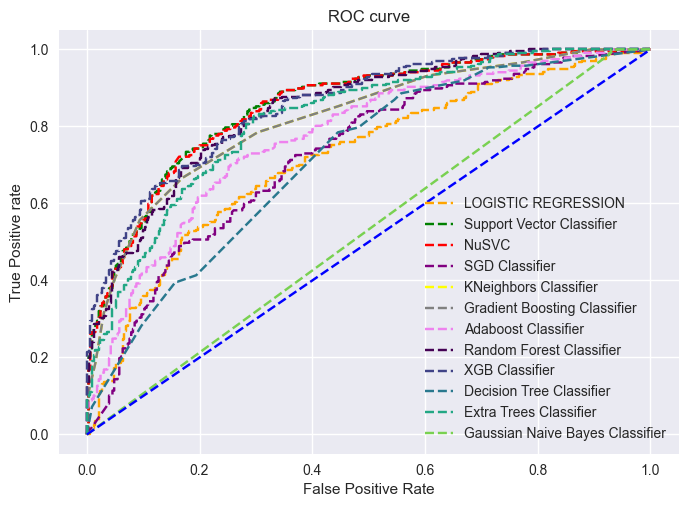

In [35]:
pred_prob1 = lr_model.fit(X_train, y_train).predict_proba(X_test)
pred_prob2 = svc_model.fit(X_train, y_train).predict_proba(X_test)
pred_prob3 = nusvc_model.fit(X_train, y_train).predict_proba(X_test)
pred_prob4 = sgd_model.fit(X_train, y_train).predict_proba(X_test)
pred_prob5 = kneighbors_model.fit(X_train, y_train).predict_proba(X_test)
pred_prob6 = gradientBoosting_model.fit(X_train, y_train).predict_proba(X_test)
pred_prob7 = AdaBoost_model.fit(X_train, y_train).predict_proba(X_test)
pred_prob8 = RFC_model.fit(X_train, y_train).predict_proba(X_test)
pred_prob9 = XGB_Classifier_model.fit(X_train, y_train).predict_proba(X_test)
pred_prob10 = DTC_model.fit(X_train, y_train).predict_proba(X_test)
pred_prob11 = ExtraTreesClassifier_model.fit(X_train, y_train).predict_proba(X_test)
pred_prob12 = GaussianNB_model.fit(X_train, y_train).predict_proba(X_test)

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label=1)
fpr8, tpr8, thresh8 = roc_curve(y_test, pred_prob8[:,1], pos_label=1)
fpr9, tpr9, thresh9 = roc_curve(y_test, pred_prob9[:,1], pos_label=1)
fpr10, tpr10, thresh10 = roc_curve(y_test, pred_prob10[:,1], pos_label=1)
fpr11, tpr11, thresh11 = roc_curve(y_test, pred_prob11[:,1], pos_label=1)
fpr12, tpr12, thresh12 = roc_curve(y_test, pred_prob12[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='LOGISTIC REGRESSION')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Support Vector Classifier')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='NuSVC')
plt.plot(fpr4, tpr4, linestyle='--',color='purple', label='SGD Classifier')
plt.plot(fpr5, tpr5, linestyle='--',color='yellow', label='KNeighbors Classifier')
plt.plot(fpr5, tpr5, linestyle='--',color='grey', label='Gradient Boosting Classifier')
plt.plot(fpr7, tpr7, linestyle='--',color='violet', label='Adaboost Classifier')
plt.plot(fpr8, tpr8, linestyle='--',color='#440154', label='Random Forest Classifier')
plt.plot(fpr9, tpr9, linestyle='--',color='#404387', label='XGB Classifier')
plt.plot(fpr10, tpr10, linestyle='--',color='#29788E', label='Decision Tree Classifier')
plt.plot(fpr11, tpr11, linestyle='--',color='#22A784', label='Extra Trees Classifier')
plt.plot(fpr12, tpr12, linestyle='--',color='#79D151', label='Gaussian Naive Bayes Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC.svg')
plt.show();

In [36]:
models_classifier_comparison.to_csv("../Saved Models/Classifier Models/random_state_0/HEA_Classifier_results_dataframe.csv")

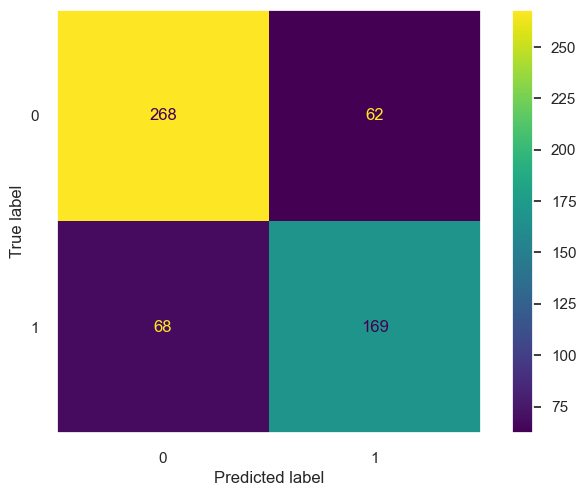

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


filename1 = '../Saved Models/Classifier Models/random_state_0/classifier_gradientBoosting.sav'
gradientBoosting_model = pickle.load(open(filename1, 'rb'))

# train_pred = gradientBoosting_model.predict(X_train)
test_pred = gradientBoosting_model.predict(X_test)

ax = plt.subplot(1,1,1)
ax.grid(False)

cfm = confusion_matrix(y_test, test_pred)
cfm_display = ConfusionMatrixDisplay(confusion_matrix=cfm)
cfm_display.plot(ax=ax)
plt.savefig("Confusion_Matrix.svg")

## Regression
---
This submodule is used to predict the bulk modulus values for the inputs 

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import KFold
from hypopt import GridSearch
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae 
from sklearn.neighbors import KNeighborsRegressor
import pickle

Data Loading and Scaling

In [39]:
bulk_hea = pd.read_csv("../Datasets/HEA_BulkModulus.csv")
bulk_hea.columns

Index(['Alloy', 'S_Phase', 'BulkModulus (GPa)', 'AM', 'IM', 'SS', 'Ag', 'Al',
       'As', 'Au', 'B', 'Ba', 'Be', 'Bi', 'Br', 'C', 'Ca', 'Cd', 'Ce', 'Cl',
       'Co', 'Cr', 'Cs', 'Cu', 'Dy', 'Er', 'Eu', 'F', 'Fe', 'Ga', 'Gd', 'Ge',
       'H', 'Hf', 'Hg', 'Ho', 'I', 'In', 'Ir', 'K', 'La', 'Li', 'Lu', 'Mg',
       'Mn', 'Mo', 'N', 'Na', 'Nb', 'Nd', 'Ne', 'Ni', 'Ns', 'O', 'Os', 'P',
       'Pb', 'Pd', 'Pr', 'Pt', 'Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Sc', 'Se',
       'Si', 'Sm', 'Sn', 'Sr', 'Ta', 'Tb', 'Te', 'Ti', 'Tl', 'Tm', 'V', 'W',
       'Y', 'Yb', 'Zn', 'Zr'],
      dtype='object')

In [40]:
features = ['AM', 'IM', 'SS', 'Ag', 'Al', 'As','Au', 'B', 'Ba', 'Be', 'Bi', 'Br', 'C', 'Ca', 'Cd', 'Ce', 'Cl', 'Co','Cr', 'Cs', 'Cu', 'Dy', 'Er', 'Eu', 'F', 'Fe', 'Ga', 'Gd', 'Ge', 'H','Hf', 'Hg', 'Ho', 'I', 'In', 'Ir', 'K', 'La', 'Li', 'Lu', 'Mg', 'Mn','Mo', 'N', 'Na', 'Nb', 'Nd', 'Ne', 'Ni', 'Ns', 'O', 'Os', 'P', 'Pb','Pd', 'Pr', 'Pt', 'Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Sc', 'Se', 'Si','Sm', 'Sn', 'Sr', 'Ta', 'Tb', 'Te', 'Ti', 'Tl', 'Tm', 'V', 'W', 'Y','Yb', 'Zn', 'Zr']

In [41]:
X = bulk_hea[features]#, errors = 'ignore'.astype('float').values
y = bulk_hea['BulkModulus (GPa)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .70)

X_train.to_csv("../Datasets/Regressor_sets/random_state_0/Regressor_X_train.csv", index=False)
X_test.to_csv("../Datasets/Regressor_sets/random_state_0/Regressor_X_test.csv", index=False)
pd.DataFrame(y_train).to_csv("../Datasets/Regressor_sets/random_state_0/Regressor_y_train.csv", index=False)
pd.DataFrame(y_test).to_csv("../Datasets/Regressor_sets/random_state_0/Regressor_y_test.csv", index=False)

In [42]:
def RMSE(y_true,y_pred):
  RMSE = np.sqrt(mean_squared_error(y_true,y_pred))
  return RMSE

def MSE(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    #print 'MSE: %2.3f' % mse
    return mse

def adjusted_r_squared(X, y, r2_sc):
  Adj_r2 = 1 - (1-r2_sc) * (len(y)-1)/(len(y)-X.shape[1]-1)
  return Adj_r2

def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def MAPE(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [43]:
X_train.head()

,AM,IM,SS,Ag,Al,As,Au,B,Ba,Be,...,Te,Ti,Tl,Tm,V,W,Y,Yb,Zn,Zr
190,1,0,0,0.0,0.000000,0,0.0,0.01,0,0.0,...,0,0.5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
969,0,1,1,0.0,0.183673,0,0.0,0.00,0,0.0,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145,1,0,0,0.0,0.110000,0,0.0,0.00,0,0.0,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
457,0,1,0,0.0,0.208333,0,0.0,0.00,0,0.0,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
318,0,1,0,0.0,0.000000,0,0.0,0.00,0,0.0,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Random Forest Regressor

In [44]:
n_estimators = [100, 200, 350, 500, 1000, 2000, 5000, 10000]
max_depth = [int(x) for x in range(5,90,10)]
n_jobs = [-1]
random_state = [42]


random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'n_jobs':n_jobs,
               'random_state':random_state
               }

rf_gsc = GridSearch(model=RandomForestRegressor(),param_grid=random_grid,cv_folds=5)
rf_model = rf_gsc.fit(X_train,y_train) #.values.ravel()

In [45]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 25,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Extreme Gradient Boosting(XGB) Regressor 

In [46]:
n_estimators = [100, 200, 500, 1000, 2000, 5000, 10000] # tradeoff b/w n_estimators and learning_rate
learning_rate = [x for x in np.arange(0.3,0.6,0.1)]
criterion = ['mae']
max_depth = [int(x) for x in range(2,10)] 
n_jobs = [-1]

random_grid = {'n_estimators': n_estimators,
               'learning_rate':learning_rate,
               'max_depth': max_depth,
               'n_jobs':n_jobs
               },

xgb_gsc = GridSearch(model=XGBRegressor(),param_grid=random_grid,cv_folds=5)    
xgb_model = xgb_gsc.fit(X_train,y_train)

In [47]:
xgb_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.3,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 2,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 10000,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

Linear Regression

In [48]:
normalize = [True]
n_jobs = [-1]

random_grid = {'n_jobs':n_jobs}

lr_gsc = GridSearch(model=LinearRegression(),param_grid=random_grid,cv_folds=5)    
lr_model = lr_gsc.fit(X_train,y_train)


In [49]:
lr_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}

Lasso Regression

In [50]:
alpha=[x for x in np.arange(0.001,0.01,0.0001)]
random_state = [42] 

random_grid = {'alpha':alpha, 'random_state':random_state}

lasso_r_gsc = GridSearch(model=Lasso(),param_grid=random_grid,cv_folds=5)
lasso_r_model = lasso_r_gsc.fit(X_train,y_train)

In [52]:
lasso_r_model.get_params()

{'alpha': 0.001,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': 42,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

Ridge Regression

In [53]:
alpha=[x for x in np.arange(0.001,1,0.001)]
random_state = [42]
solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']

random_grid = {'alpha':alpha, 'random_state':random_state, 'solver':solver}

ridge_r_gsc = GridSearch(model=Ridge(),param_grid=random_grid,cv_folds=5)    
ridge_r_model = ridge_r_gsc.fit(X_train,y_train)

In [54]:
ridge_r_model.get_params()

{'alpha': 0.001,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': 42,
 'solver': 'sparse_cg',
 'tol': 0.0001}

In [55]:
alpha=[x for x in np.arange(0.001,0.1,0.001)]
random_state = [42]
ratio = [x for x in np.arange(0.1, 1, 0.1)]

random_grid = {'alpha':alpha,
               "l1_ratio": ratio,
               'random_state':random_state}

elasticnet_r_gsc = GridSearch(model=ElasticNet(),param_grid=random_grid,cv_folds=5)
elasticnet_r_model = elasticnet_r_gsc.fit(X_train,y_train)

In [56]:
elasticnet_r_model.get_params()

{'alpha': 0.001,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.9,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': 42,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

KNeighborsRegressor

In [57]:
leaf_size = list(range(27,33)) 
n_neighbors = list(range(1,15)) 
algorithm = ["auto", "ball_tree", "kd_tree", "brute"]
p = [1,2] #For p = 1 ->manhattan_distance; for p = 2 ->euclidean_distance
random_grid = dict(leaf_size=leaf_size, n_neighbors=n_neighbors,algorithm = algorithm,p = p)

knnr_gsc = GridSearch(model=KNeighborsRegressor(),param_grid=random_grid,cv_folds=5)   

knnr_model = knnr_gsc.fit(X_train, y_train)


In [58]:
knnr_model.get_params()

{'algorithm': 'kd_tree',
 'leaf_size': 27,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 1,
 'weights': 'uniform'}

In [59]:
filename1 = '../Saved Models/Regressor Models/random_state_0/random_forest_regressor.sav'
pickle.dump(rf_model, open(filename1, 'wb'))

filename2 = '../Saved Models/Regressor Models/random_state_0/XGBoost_regressor.sav'
pickle.dump(xgb_model, open(filename2, 'wb'))

filename3 = '../Saved Models/Regressor Models/random_state_0/Linear_regressor.sav'
pickle.dump(lr_model, open(filename3, 'wb'))

filename4 = '../Saved Models/Regressor Models/random_state_0/Lasso_regressor.sav'
pickle.dump(lasso_r_model, open(filename4, 'wb'))

filename5 = '../Saved Models/Regressor Models/random_state_0/Ridge_regressor.sav'
pickle.dump(ridge_r_model, open(filename5, 'wb'))

filename6 = '../Saved Models/Regressor Models/random_state_0/KNN_regressor.sav'
pickle.dump(knnr_model, open(filename6, 'wb'))

filename7 = '../Saved Models/Regressor Models/random_state_0/Elasticnet_regressor.sav'
pickle.dump(elasticnet_r_model, open(filename7, 'wb'))

In [60]:
filename1 = '../Saved Models/Regressor Models/random_state_0/random_forest_regressor.sav'
random_forest_model = pickle.load(open(filename1, 'rb'))

train_pred = random_forest_model.predict(X_train)
test_pred = random_forest_model.predict(X_test)
  
rf_r2_Train = random_forest_model.score(X_train,y_train)
rf_r2_Test = random_forest_model.score(X_test,y_test)
rf_mse_Train = mse(y_train, train_pred)
rf_mse_Test = mse(y_test, test_pred)
rf_mae_Train = mae(y_train, train_pred)
rf_mae_Test = mae(y_test, test_pred)
rf_mape_Train = MAPE(y_train, train_pred)
rf_mape_Test = MAPE(y_test, test_pred)
rf_adj_r2_Train = adjusted_r_squared(X_train, y_train, rf_r2_Train)
rf_adj_r2_Test = adjusted_r_squared(X_test, y_test, rf_r2_Test)
rf_cross_val_score_Train = list(cross_val_score(random_forest_model, X_train, y_train, scoring = 'r2',  cv=KFold(n_splits=5,shuffle=True)) )


filename1 = '../Saved Models/Regressor Models/random_state_0/XGBoost_regressor.sav'
XGBoost_regressor_model = pickle.load(open(filename1, 'rb'))


train_pred = XGBoost_regressor_model.predict(X_train)
test_pred = XGBoost_regressor_model.predict(X_test)

xgb_r2_Train = XGBoost_regressor_model.score(X_train,y_train)
xgb_r2_Test = XGBoost_regressor_model.score(X_test,y_test)
xgb_mse_Train = mse(y_train, train_pred)
xgb_mse_Test = mse(y_test, test_pred)
xgb_mae_Train = mae(y_train, train_pred)
xgb_mae_Test = mae(y_test, test_pred)
xgb_mape_Train = MAPE(y_train, train_pred)
xgb_mape_Test = MAPE(y_test, test_pred)
xgb_adj_r2_Train = adjusted_r_squared(X_train, y_train, xgb_r2_Train)
xgb_adj_r2_Test = adjusted_r_squared(X_test, y_test, xgb_r2_Test)
xgb_cross_val_score_Train = list(cross_val_score(XGBoost_regressor_model, X_train, y_train, scoring = 'r2', cv=KFold(n_splits=5,shuffle=True)) )



filename1 = '../Saved Models/Regressor Models/random_state_0/Linear_regressor.sav'
Linear_regressor_model = pickle.load(open(filename1, 'rb'))


train_pred = Linear_regressor_model.predict(X_train)
test_pred = Linear_regressor_model.predict(X_test)

  
lr_r2_Train = Linear_regressor_model.score(X_train,y_train)
lr_r2_Test = Linear_regressor_model.score(X_test,y_test)
lr_mse_Train = mse(y_train, train_pred)
lr_mse_Test = mse(y_test, test_pred)
lr_mae_Train = mae(y_train, train_pred)
lr_mae_Test = mae(y_test, test_pred)
lr_mape_Train = MAPE(y_train, train_pred)
lr_mape_Test = MAPE(y_test, test_pred)
lr_adj_r2_Train = adjusted_r_squared(X_train, y_train, lr_r2_Train)
lr_adj_r2_Test = adjusted_r_squared(X_test, y_test, lr_r2_Test)
lr_cross_val_score_Train = list(cross_val_score(Linear_regressor_model, X_train, y_train, scoring = 'r2',  cv=KFold(n_splits=5,shuffle=True)) )


filename1 = '../Saved Models/Regressor Models/random_state_0/Lasso_regressor.sav'
Lasso_regressor_model = pickle.load(open(filename1, 'rb'))


train_pred = Lasso_regressor_model.predict(X_train)
test_pred = Lasso_regressor_model.predict(X_test)

  
lasso_r_r2_Train = Lasso_regressor_model.score(X_train,y_train)
lasso_r_r2_Test = Lasso_regressor_model.score(X_test,y_test)
lasso_r_mse_Train = mse(y_train, train_pred)
lasso_r_mse_Test = mse(y_test, test_pred)
lasso_r_mae_Train = mae(y_train, train_pred)
lasso_r_mae_Test = mae(y_test, test_pred)
lasso_r_mape_Train = MAPE(y_train, train_pred)
lasso_r_mape_Test = MAPE(y_test, test_pred)
lasso_r_adj_r2_Train = adjusted_r_squared(X_train, y_train, lasso_r_r2_Train)
lasso_r_adj_r2_Test = adjusted_r_squared(X_test, y_test, lasso_r_r2_Test)
lasso_r_cross_val_score_Train = list(cross_val_score(Lasso_regressor_model, X_train, y_train, scoring = 'r2',  cv=KFold(n_splits=5,shuffle=True)) )


filename1 = '../Saved Models/Regressor Models/random_state_0/Ridge_regressor.sav'
ridge_model = pickle.load(open(filename1, 'rb'))


train_pred = ridge_model.predict(X_train)
test_pred = ridge_model.predict(X_test)

  
ridge_r_r2_Train = ridge_model.score(X_train,y_train)
ridge_r_r2_Test = ridge_model.score(X_test,y_test)
ridge_r_mse_Train = mse(y_train, train_pred)
ridge_r_mse_Test = mse(y_test, test_pred)
ridge_r_mae_Train = mae(y_train, train_pred)
ridge_r_mae_Test = mae(y_test, test_pred)
ridge_r_mape_Train = MAPE(y_train, train_pred)
ridge_r_mape_Test = MAPE(y_test, test_pred)
ridge_r_adj_r2_Train = adjusted_r_squared(X_train, y_train, ridge_r_r2_Train)
ridge_r_adj_r2_Test = adjusted_r_squared(X_test, y_test, ridge_r_r2_Test)
ridge_r_cross_val_score_Train = list(cross_val_score(ridge_model, X_train, y_train, scoring = 'r2',  cv=KFold(n_splits=5,shuffle=True)) )

filename1 = '../Saved Models/Regressor Models/random_state_0/Elasticnet_regressor.sav'
elasticnet_model = pickle.load(open(filename1, 'rb'))


train_pred = elasticnet_model.predict(X_train)
test_pred = elasticnet_model.predict(X_test)


elasticnet_r_r2_Train = elasticnet_model.score(X_train,y_train)
elasticnet_r_r2_Test = elasticnet_model.score(X_test,y_test)
elasticnet_r_mse_Train = mse(y_train, train_pred)
elasticnet_r_mse_Test = mse(y_test, test_pred)
elasticnet_r_mae_Train = mae(y_train, train_pred)
elasticnet_r_mae_Test = mae(y_test, test_pred)
elasticnet_r_mape_Train = MAPE(y_train, train_pred)
elasticnet_r_mape_Test = MAPE(y_test, test_pred)
elasticnet_r_adj_r2_Train = adjusted_r_squared(X_train, y_train, elasticnet_r_r2_Train)
elasticnet_r_adj_r2_Test = adjusted_r_squared(X_test, y_test, elasticnet_r_r2_Test)
elasticnet_r_cross_val_score_Train = list(cross_val_score(ridge_model, X_train, y_train, scoring = 'r2',  cv=KFold(n_splits=5,shuffle=True)) )

filename1 = '../Saved Models/Regressor Models/random_state_0/KNN_regressor.sav'
KNN_regressor_model = pickle.load(open(filename1, 'rb'))


train_pred = KNN_regressor_model.predict(X_train)
test_pred = KNN_regressor_model.predict(X_test)

  
knnr_r2_Train = KNN_regressor_model.score(X_train,y_train)
knnr_r2_Test = KNN_regressor_model.score(X_test,y_test)
knnr_mse_Train = mse(y_train, train_pred)
knnr_mse_Test = mse(y_test, test_pred)
knnr_mae_Train = mae(y_train, train_pred)
knnr_mae_Test = mae(y_test, test_pred)
knnr_mape_Train = MAPE(y_train, train_pred)
knnr_mape_Test = MAPE(y_test, test_pred)
knnr_adj_r2_Train = adjusted_r_squared(X_train, y_train, knnr_r2_Train)
knnr_adj_r2_Test = adjusted_r_squared(X_test, y_test, knnr_r2_Test)
knnr_cross_val_score_Train = list(cross_val_score(KNN_regressor_model, X_train, y_train, scoring = 'r2', cv=KFold(n_splits=5,shuffle=True)) )


In [61]:
models_regressor_comparison = pd.DataFrame({
    'Model'       : ['Random Forest', 'XG Boost Regressor', 'Linear Regression', 'Lasso Regression', 'Ridge Regression', "ElasticNet Regression", 'KNN Regressor' ],
    'Train R-square': [rf_r2_Train, xgb_r2_Train, lr_r2_Train, lasso_r_r2_Train,   ridge_r_r2_Train, elasticnet_r_r2_Train, knnr_r2_Train],
    'Test R-square': [rf_r2_Test, xgb_r2_Test, lr_r2_Test, lasso_r_r2_Test,  ridge_r_r2_Test, elasticnet_r_r2_Test, knnr_r2_Test],
    'Train MSE'    : [rf_mse_Train, xgb_mse_Train, lr_mse_Train, lasso_r_mse_Train,  ridge_r_mse_Train, elasticnet_r_mse_Train, knnr_mse_Train],
    'Test MSE'   : [rf_mse_Test, xgb_mse_Test, lr_mse_Test, lasso_r_mse_Test, ridge_r_mse_Test, elasticnet_r_mse_Test, knnr_mse_Test],
    'Train MAE':[rf_mae_Train, xgb_mae_Train, lr_mae_Train, lasso_r_mae_Train, ridge_r_mae_Train, elasticnet_r_mae_Train, knnr_mae_Train],
    'Test MAE':[rf_mae_Test, xgb_mae_Test, lr_mae_Test, lasso_r_mae_Test, ridge_r_mae_Test, elasticnet_r_mae_Test, knnr_mae_Test],
    'Train MAPE':[rf_mape_Train, xgb_mape_Train, lr_mape_Train, lasso_r_mape_Train, ridge_r_mape_Train, elasticnet_r_mape_Train, knnr_mape_Train],
    'Test MAPE':[rf_mape_Test, xgb_mape_Test, lr_mape_Test, lasso_r_mape_Test, ridge_r_mape_Test, elasticnet_r_mape_Test, knnr_mape_Test],
    'Train Adj. R-square': [rf_adj_r2_Train, xgb_adj_r2_Train, lr_adj_r2_Train, lasso_r_adj_r2_Train,    ridge_r_adj_r2_Train,elasticnet_r_adj_r2_Train, knnr_adj_r2_Train],
    'Test Adj. R-square': [rf_adj_r2_Test, xgb_adj_r2_Test, lr_adj_r2_Test, lasso_r_adj_r2_Test,  ridge_r_adj_r2_Test,elasticnet_r_adj_r2_Test, knnr_adj_r2_Test],
    'Cross_Validation_Scores_for_trainset': [rf_cross_val_score_Train, xgb_cross_val_score_Train, lr_cross_val_score_Train, lasso_r_cross_val_score_Train, ridge_r_cross_val_score_Train, elasticnet_r_cross_val_score_Train, knnr_cross_val_score_Train],
    
     }, columns = ['Model', 'Train R-square', 'Test R-square', 'Train MSE', 'Test MSE', 'Train MAE', 'Test MAE', 'Train MAPE', 'Test MAPE', 'Train Adj. R-square', 'Test Adj. R-square', 'Cross_Validation_Scores_for_trainset' ])

# models_regressor_comparison.set_index('Model', inplace=True)
models_regressor_comparison.sort_values(by='Test R-square', ascending=False)

,Model,Train R-square,Test R-square,Train MSE,Test MSE,Train MAE,Test MAE,Train MAPE,Test MAPE,Train Adj. R-square,Test Adj. R-square,Cross_Validation_Scores_for_trainset
3,Lasso Regression,0.998974,9.804086e-01,1.677832,2.697876e+01,0.369990,0.836176,0.355730,1.262085,0.998859,9.743747e-01,"[0.9997243502019562, 0.8511847794345002, 0.997..."
4,Ridge Regression,0.999044,9.781160e-01,1.563932,3.013589e+01,0.290321,0.788200,0.253705,0.970524,0.998937,9.713760e-01,"[0.9996997271154792, 0.9769963734702286, 0.993..."
5,ElasticNet Regression,0.995368,9.639619e-01,7.576716,4.962709e+01,1.115207,1.927420,1.190548,3.219569,0.994848,9.528627e-01,"[0.9999061207078912, 0.9950067981682404, 0.981..."
1,XG Boost Regressor,0.999959,9.074716e-01,0.066719,1.274181e+02,0.047120,5.464281,0.033811,5.882555,0.999955,8.789743e-01,"[0.96118845265017, 0.9496411506557066, 0.97402..."
0,Random Forest,0.981837,8.689934e-01,29.706425,1.804054e+02,2.427832,6.553675,2.359458,6.953123,0.979799,8.286454e-01,"[0.919701881126636, 0.6861273300340971, 0.9426..."
6,KNN Regressor,0.969972,8.607896e-01,49.112540,1.917026e+02,3.599760,7.654176,3.372635,8.308220,0.966603,8.179149e-01,"[0.8440953614882337, 0.9175158005556205, 0.818..."
2,Linear Regression,0.999056,-4.451951e+10,1.544206,6.130653e+13,0.288802,421545.521849,0.243739,593725.651828,0.998950,-5.823084e+10,"[-37651833238635.88, -4.6507595071427014e+17, ..."


In [62]:
models_regressor_comparison.to_csv("../Saved Models/Regressor Models/random_state_0/Regression_results_dataframe.csv")

(345,)
(345, 1)


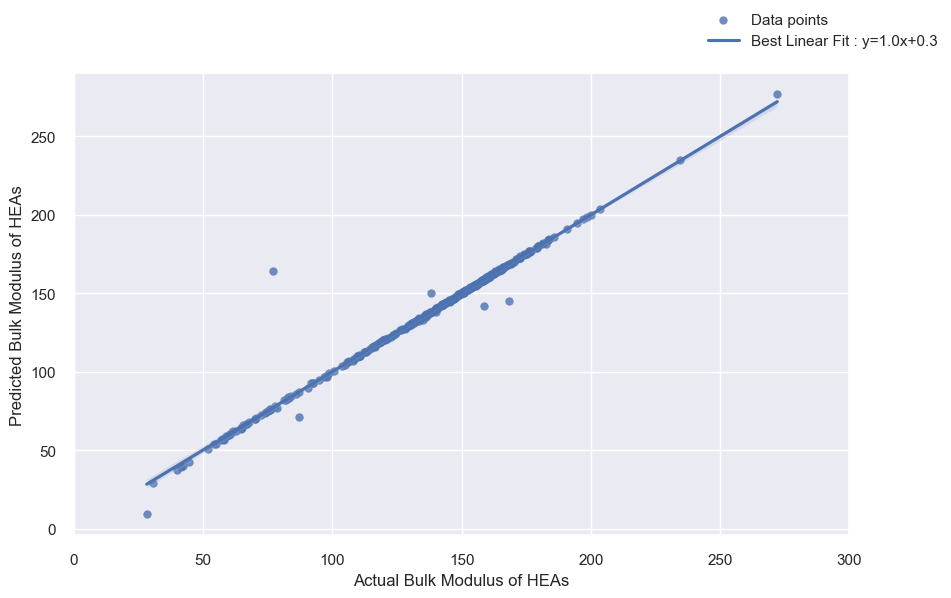

In [63]:
test_pred = lasso_r_model.predict(X_test).reshape(-1,1)[:,0]
print(test_pred.shape)
print(np.array(y_test).reshape(-1,1).shape)

d = {'Actual': list(test_pred), 'Predicted': list(np.array(y_test).reshape(-1,1)[:,0])} #['Mean_BulkModulus']
df = pd.DataFrame(d)

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df
sns.set_theme(color_codes=True)
fig = plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
ax.set_xlim(0, 300)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Actual'],df['Predicted'])
sns.regplot(x = 'Actual',y = 'Predicted',data = df,line_kws={'label':"Best Linear Fit : " + "y={0:.1f}x+{1:.1f}".format(slope,intercept)},label='Data points')
plt.xlabel('Actual Bulk Modulus of HEAs')
plt.ylabel('Predicted Bulk Modulus of HEAs')
fig.legend()
# plt.savefig("Residual_plot.svg")